In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [14]:
winedata = pd.read_csv('winequalityN.csv')
print(winedata.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [15]:
winedata.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [16]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [17]:
winedata.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

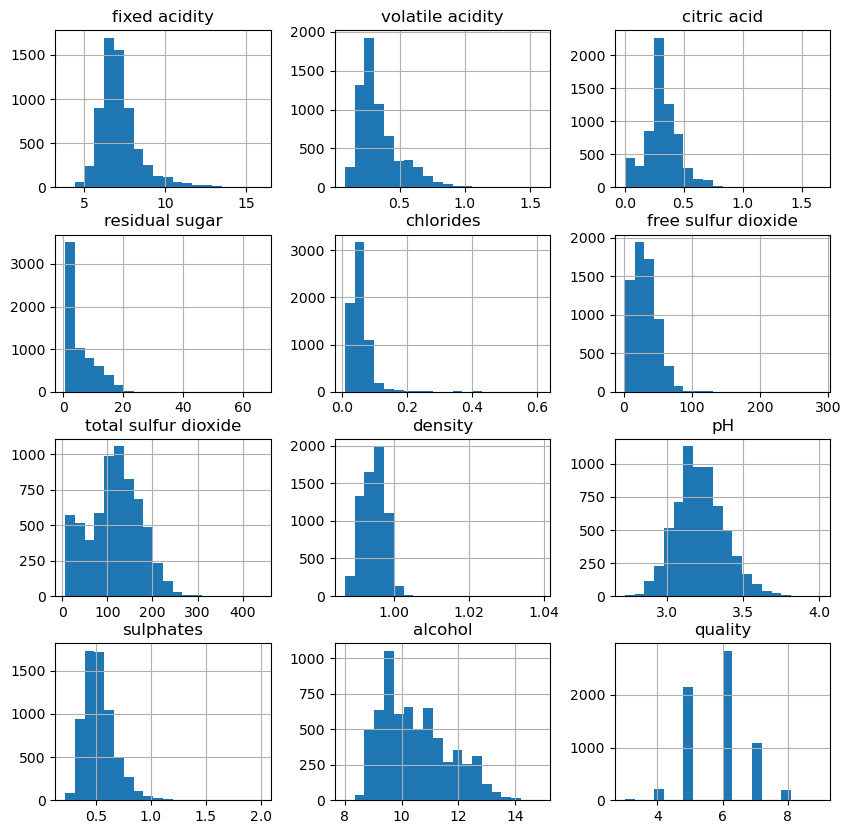

In [18]:
#to show histogram
winedata.hist(bins=20, figsize=(10, 10))
plt.show()

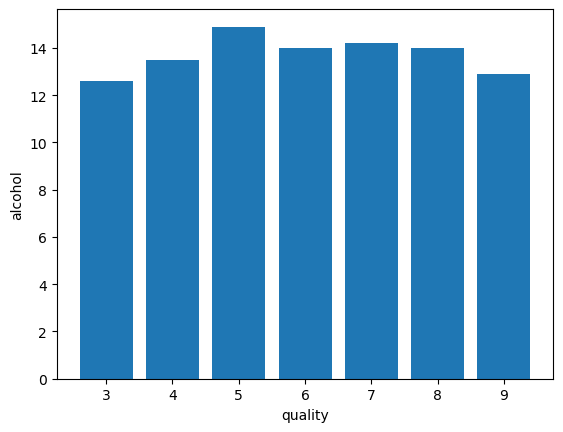

In [19]:
#to draw the count plot to visualise the number data for each quality of wine
plt.bar(winedata['quality'], winedata['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


<Axes: >

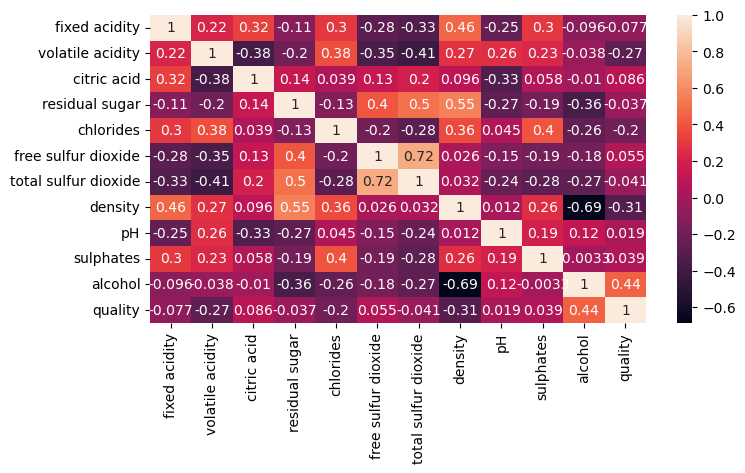

In [25]:
plt.figure(figsize=[8,4],facecolor='white')
sb.heatmap(winedata.corr(),annot=True)

In [21]:
for a in range(len(winedata.corr().columns)):
    for b in range(a):
        if abs(winedata.corr().iloc[a,b]) >0.7:
            name = winedata.corr().columns[a]
            print(name)

total sulfur dioxide


In [28]:
dataset = winedata.drop('total sulfur dioxide', axis=1)
dataset.isnull().sum()
dataset.update(dataset.fillna(dataset.mean()))
# catogerical vars 
next_df = pd.get_dummies(dataset,drop_first=True)
# display new dataframe
next_df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [31]:
dataset['best quality'] = [ 1 if x>=7 else 0 for x in winedata.quality] 
print(dataset)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  \


In [43]:
dataset.replace({'white': 1, 'red': 0}, inplace=True)

In [44]:
#splitting
features = dataset.drop(['quality', 'best quality'], axis=1)
target = dataset['best quality']
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [45]:
#Normalising
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(xtrain)
new_xtrain = norm.fit_transform(xtrain)
new_xtest = norm.fit_transform(xtest)
# display values
print(new_xtrain)

[[1.         0.34710744 0.1        ... 0.46511628 0.14044944 0.26086957]
 [1.         0.20661157 0.18       ... 0.30232558 0.15168539 0.11594203]
 [1.         0.24793388 0.06666667 ... 0.21705426 0.16853933 0.14492754]
 ...
 [0.         0.33884298 0.38666667 ... 0.5503876  0.20224719 0.2173913 ]
 [0.         0.24793388 0.34       ... 0.53488372 0.25280899 0.24637681]
 [1.         0.19008264 0.16666667 ... 0.51937984 0.24157303 0.2173913 ]]


In [54]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,ytrain)
# predicting score
rnd_score = rnd.score(new_xtest,ytest)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
y_predict=rnd.predict(xtest)
rnd_MSE = mean_squared_error(ytest,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,ytest))

score of model is :  0.7976923076923077
calculating the error
mean squared error is :  0.20923076923076922
root mean squared error is :  0.4574174999174925
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1300
           1       0.00      0.00      0.00         0

    accuracy                           0.79      1300
   macro avg       0.50      0.40      0.44      1300
weighted avg       1.00      0.79      0.88      1300



In [48]:
x_predict = list(rnd.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
4019,0,0
871,0,0
3710,0,0
3781,0,0
1248,0,1


In [49]:
#saving model
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))